In [1]:
%matplotlib inline
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc

## Draw court

In [2]:
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 46cm so it has a radius of 23cm, which is a value
    # 2.3 in our coordinate system
    hoop = Circle((0, 0), radius=2.3, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-9, -2.3), 18, -0.1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=4.9m, height=5.8m
    outer_box = Rectangle((-24.45, -14.3), 49, 58, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=3.6ft, height=5.8ft
    inner_box = Rectangle((-18, -14.3), 36, 58, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 43.7), 36, 36, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 43.7), 36, 36, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 25, 25, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 2.68m long before they begin to arc
    corner_three_a = Rectangle((-66, -14.3), 0, 28.8, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((66, -14.3), 0, 28.8, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 6.75m away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 135, 135, theta1=12, theta2=168, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 125.7), 36, 36, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 125.7), 12, 12, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [
        hoop,
        backboard,
        outer_box,
        inner_box,
        top_free_throw,
        bottom_free_throw,
        restricted,
        corner_three_a,
        corner_three_b,
        three_arc,
        center_outer_arc,
        center_inner_arc
    ]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-75, -14.3), 150, 140, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

### Show shot chart

In [3]:
def show_shot_chart(shooter, title="shot chart"):

    plt.figure(figsize=(12,11))
    plt.scatter(shooter.x, shooter.y, c='green', s=3)

    draw_court(outer_lines=True)

    plt.xlim(-80,80)
    plt.ylim(-20, 140)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.gca().set_facecolor('#ffffff')
    plt.gca().set_title(title)

    plt.show()

## Load data

In [4]:
def load_data(dirname, filename):
    currdir = os.getcwd()
    datadir = os.path.abspath(os.path.join(currdir, dirname))
    return os.path.abspath(os.path.join(datadir, filename))

In [5]:
dirname = '../../../data/'
filename = 'uaap-season81-fibalivestats-shotchart-data-CLEANED.csv'
outdir = 'outputs/players-fg'

df_fg = pd.read_csv(load_data(dirname, filename))

In [6]:
df_fg

,team,opponent,made,x,y,num,player,points,shot_type,date,venue
0,NU,UST,0,8,3,9,J. Clemente,2,jump shot,2018.09.08,MOA
1,NU,UST,1,0,2,10,I. Gaye,2,dunk,2018.09.08,MOA
2,NU,UST,1,-1,16,8,A. Joson,2,jump shot,2018.09.08,MOA
3,NU,UST,0,4,8,1,D. Ildefonso,2,jump shot,2018.09.08,MOA
4,NU,UST,0,62,43,1,D. Ildefonso,3,jump shot,2018.09.08,MOA
...,...,...,...,...,...,...,...,...,...,...,...
7614,ADU,FEU,1,-1,6,20,K. Bernardo,2,lay up,2018.11.18,MOA
7615,ADU,FEU,1,-7,-1,28,M. Macion,2,jump shot,2018.11.18,MOA
7616,ADU,FEU,0,8,6,9,W. Magbuhos,2,jump shot,2018.11.18,MOA
7617,ADU,FEU,0,4,0,17,J. Colonia,2,jump shot,2018.11.18,MOA


## Add column for points scored (made_points)

In [7]:
# add column for points scored (made_points)

df_fg['made_points'] = df_fg.apply(lambda row: row.made * row.points, axis=1)
df_fg
df_fg.to_csv('{}/players-fg-all.csv'.format(outdir), index_label='fg_id_all')

## Make summary table of players
- Group by players
- Add team, fga, fg, ppa columns

In [8]:
df_fg_summ = df_fg[['player', 'team', 'made', 'points', 'made_points']].groupby('player').agg(
    team=pd.NamedAgg(column='team', aggfunc='first'),
    fg=pd.NamedAgg(column='made', aggfunc='sum'),
    fga=pd.NamedAgg(column='points', aggfunc='count'),
    points=pd.NamedAgg(column='made_points', aggfunc='sum'),
)
df_fg_summ = df_fg_summ.reset_index()
df_fg_summ.to_csv('{}/players-summary-all.csv'.format(outdir), index_label='p_id_all')
df_fg_summ.sort_values(by='fga', ascending=False).to_csv('{}/players-summary-all-sorted.csv'.format(outdir), index_label='p_id_all')

## Get list of FGA of all retained players (FGA >= 28) and dropped players (FGA < 28)

In [9]:
retain_players = df_fg_summ[df_fg_summ.fga>=28].player.values
drop_players = df_fg_summ[df_fg_summ.fga<28].player.values

## Make DataFrame of retained players FG
- save the FG of retained and dropped players

In [10]:
df_fg[df_fg.player.isin(retain_players)].to_csv('{}/players-fg-retained.csv'.format(outdir), index_label='fg_id_all')
df_fg[~df_fg.player.isin(retain_players)].to_csv('{}/players-fg-dropped.csv'.format(outdir), index_label='fg_id_all')

df_fg_retain = df_fg[df_fg.player.isin(retain_players)]
df_fg_retain

,team,opponent,made,x,y,num,player,points,shot_type,date,venue,made_points
0,NU,UST,0,8,3,9,J. Clemente,2,jump shot,2018.09.08,MOA,0
1,NU,UST,1,0,2,10,I. Gaye,2,dunk,2018.09.08,MOA,2
2,NU,UST,1,-1,16,8,A. Joson,2,jump shot,2018.09.08,MOA,2
3,NU,UST,0,4,8,1,D. Ildefonso,2,jump shot,2018.09.08,MOA,0
4,NU,UST,0,62,43,1,D. Ildefonso,3,jump shot,2018.09.08,MOA,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7605,ADU,FEU,1,13,5,4,C. Catapusan,2,jump shot,2018.11.18,MOA,2
7606,ADU,FEU,1,-34,11,7,J. Lastimosa,2,jump shot,2018.11.18,MOA,2
7607,ADU,FEU,0,4,3,11,J. Espeleta,2,jump shot,2018.11.18,MOA,0
7608,ADU,FEU,0,-34,-12,7,J. Lastimosa,3,jump shot,2018.11.18,MOA,0


## Get summary of players with FGA >= 28

In [11]:
df_fg_summ_retained = df_fg_summ[df_fg_summ.player.isin(retain_players)]
df_fg_summ_retained.to_csv('{}/players-summary-retained.csv'.format(outdir), index_label='p_id_all')
df_fg_summ_retained.sort_values(by='fga', ascending=False).reset_index().drop(columns=['index']).to_csv('{}/players-summary-retained-sorted.csv'.format(outdir), index_label='p_id_retained')

In [12]:
df_fg_pts = df_fg_retain[['player', 'team', 'made', 'points', 'made_points']].groupby(['player', 'points']).agg(
    team=pd.NamedAgg(column='team', aggfunc='first'),
    fg=pd.NamedAgg(column='made', aggfunc='sum'),
    fga=pd.NamedAgg(column='points', aggfunc='count'),
    points=pd.NamedAgg(column='made_points', aggfunc='sum'),
)
# fg_pts_df
df_fg_pts

team  fg  fga  points
player      points                       
A. Asistio  2       ADMU   7   27      14
            3       ADMU  28   62      84
A. Caracut  2       DLSU  34   84      68
            3       DLSU  12   43      36
A. Diputado 2         NU  16   33      32
...                  ...  ..  ...     ...
W. Comboy   3        FEU  18   58      54
W. Navarro  2       ADMU  20   42      40
            3       ADMU   1   24       3
Z. Huang    2        UST  39   90      78
            3        UST   1   11       3

[157 rows x 4 columns]

## Samples

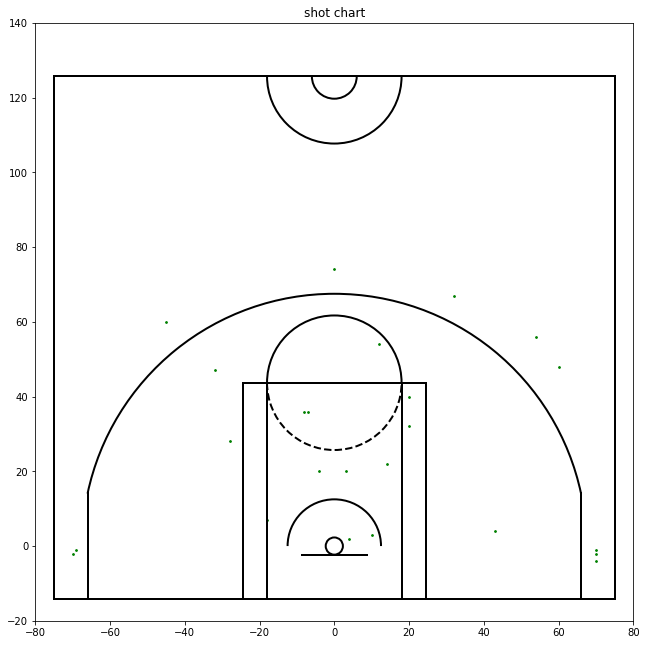

In [13]:
show_shot_chart(df_fg[(df_fg.team=='UST') & (df_fg.opponent=='NU') & (df_fg.player=='R. Subido') & (df_fg.date=='2018.09.08')])